In [20]:
import tensorflow as tf
import keras
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [1]:
#loading the data
def load_data(path):
    loaded_data = loadmat(path)
    return loaded_data['X'], loaded_data['y']

X_train, Y_train = load_data('train')
X_test, Y_test = load_data('test_32x32.mat')
X_train_original = X_train
X_test_original = X_test

NameError: name 'loadmat' is not defined

In [3]:
#changing the shape of the training and the test dataset
X_train = X_train.transpose((3, 0, 1, 2))
X_test = X_test.transpose((3, 0, 1, 2))

In [4]:
#converting 2-D array into 1-D array
Y_train = Y_train[:,0]
Y_test = Y_test[:,0]

In [5]:
#changing the label of 0 from 10 to 0
Y_train[Y_train==10] = 0
Y_test[Y_test==10] = 0

In [6]:
X_train_original = X_train
Y_train_original = Y_train
X_test_original = X_test

In [7]:
#splitting the training set into training and validation set using sklearn
#using random_state to generate the same sets everytime
X_train, X_val, Y_train, Y_val = train_test_split(X_train_original, Y_train_original, test_size=0.15, random_state=3)



In [8]:
#converting array of ints to array of floats for arithmetic operations
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [9]:
rgb2grey = [0.2990, 0.5870, 0.1140]
X_train = np.expand_dims(np.dot(X_train, rgb2grey), axis=3)
X_val = np.expand_dims(np.dot(X_val, rgb2grey), axis=3)
X_test = np.expand_dims(np.dot(X_test, rgb2grey), axis=3)

In [10]:
#normalising the training data for better training
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_normalised = (X_train-train_mean)/train_std
X_val_normalised = (X_val-train_mean)/train_std
X_test_normalised = (X_test-train_mean)/train_std


In [11]:
#one-hot encoding
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [12]:
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    #compiling the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [13]:
model = create_model()

In [14]:
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_val,Y_val))


Train on 62268 samples, validate on 10989 samples
Epoch 1/20
62268/62268 [==============================] - 133s 2ms/step - loss: 1.7486 - accuracy: 0.4189 - val_loss: 1.0569 - val_accuracy: 0.6615
Epoch 2/20
62268/62268 [==============================] - 132s 2ms/step - loss: 1.0292 - accuracy: 0.6780 - val_loss: 0.7369 - val_accuracy: 0.7746
Epoch 3/20
62268/62268 [==============================] - 130s 2ms/step - loss: 0.7672 - accuracy: 0.7653 - val_loss: 0.5925 - val_accuracy: 0.8172
Epoch 4/20
62268/62268 [==============================] - 126s 2ms/step - loss: 0.6560 - accuracy: 0.7993 - val_loss: 0.5629 - val_accuracy: 0.8322
Epoch 5/20
62268/62268 [==============================] - 127s 2ms/step - loss: 0.5864 - accuracy: 0.8223 - val_loss: 0.5463 - val_accuracy: 0.8303
Epoch 6/20
62268/62268 [==============================] - 134s 2ms/step - loss: 0.5287 - accuracy: 0.8418 - val_loss: 0.4936 - val_accuracy: 0.8538
Epoch 7/20
62268/62268 [==============================] - 134s

In [15]:
scores = model.evaluate(X_test, Y_test, verbose = 1)

26032/26032 [==============================] - 13s 515us/step


In [17]:
model.save('street_view_house_numbers_model.h5')

In [22]:
model_2 = keras.models.load_model('street_view_house_numbers_model.h5')

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [26]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [27]:
#loading the data
def load_data(path):
    loaded_data = loadmat(path)
    return loaded_data['X'], loaded_data['y']

X_train, Y_train = load_data('train_32x32.mat')
X_test, Y_test = load_data('test_32x32.mat')
X_train_original = X_train
X_test_original = X_test

In [28]:
X_train.shape

(32, 32, 3, 73257)

In [29]:
X_test.shape

(32, 32, 3, 26032)

In [30]:
#changing the shape of the training and the test dataset
X_train = X_train.transpose((3, 0, 1, 2))
X_test = X_test.transpose((3, 0, 1, 2))


In [31]:
X_train.shape

(73257, 32, 32, 3)

In [32]:
X_test.shape

(26032, 32, 32, 3)

In [33]:
Y_train.ndim

2

In [34]:
Y_train = Y_train[:,0]
Y_test = Y_test[:,0]

In [35]:
Y_train.ndim

1

In [36]:
np.unique(Y_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [37]:
#changing the label of 0 from 10 to 0
Y_train[Y_train==10] = 0
Y_test[Y_test==10] = 0

In [38]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

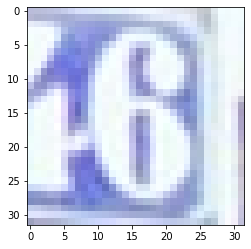

In [39]:
 plt.imshow(X_train[10600])

In [40]:
X_train_original = X_train
Y_train_original = Y_train
X_test_original = X_test

In [41]:
#splitting the training set into training and validation set using sklearn
#using random_state to generate the same sets everytime
X_train, X_val, Y_train, Y_val = train_test_split(X_train_original, Y_train_original, test_size=0.15, random_state=3)


In [42]:
X_train.shape

(62268, 32, 32, 3)

In [43]:
X_val.shape

(10989, 32, 32, 3)

In [44]:
Y_train.shape

(62268,)

In [45]:
Y_val.shape

(10989,)

In [46]:
#converting array of ints to array of floats for arithmetic operations
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [47]:
test = np.expand_dims(np.dot(X_train[0], rgb2grey), axis=2)

In [48]:
test.shape

(32, 32, 1)

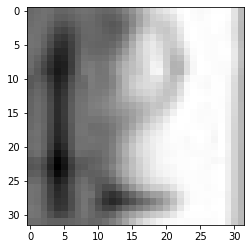

In [49]:
plt.imshow(test[:,:,0], cmap="gray")

In [50]:
#converting rgb images to grayscale images for faster computations
rgb2grey = [0.2990, 0.5870, 0.1140]
X_train = np.expand_dims(np.dot(X_train, rgb2grey), axis=3)
X_val = np.expand_dims(np.dot(X_val, rgb2grey), axis=3)
X_test = np.expand_dims(np.dot(X_test, rgb2grey), axis=3)

In [51]:
X_train.shape

(62268, 32, 32, 1)

In [52]:
#normalising the training data for better training
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_normalised = (X_train-train_mean)/train_std
X_val_normalised = (X_val-train_mean)/train_std
X_test_normalised = (X_test-train_mean)/train_std

In [53]:
Y_val.shape

(10989,)

In [54]:
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [55]:
Y_train.shape

(62268, 10)

In [56]:
Y_val.shape

(10989, 10)

In [57]:
Y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [58]:
Y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
model.save('street_view_house_numbers_model.h5')